# NetPyNE Tutorial 6: Oscillations

This tutorial shows an example of a simple two-populations network that exhibits oscillatory behaviour. In the end you are proposed to try to modifiy different parameters to change the freqency of observed oscillations.

## Preliminaries

If you are going to run this notebook locally using Jupyter Notebook, start from following instructions https://github.com/Neurosim-lab/netpyne/blob/development/netpyne/tutorials/README.md.

If you are using Open Source Brain or EBRAINS, everything is already set up.

On any other online platform (e.g. on Google Collab) you might need to run the following commmands to install NEURON and NetPyNE using **pip**:
```
!pip install neuron
!pip install netpyne
```

Now we are ready to start the tutorial.


Start time:  2024-10-30 15:29:12.443398




Creating network of 2 cell populations on 1 hosts...: 100%|##########|


  Number of cells on node 0: 40 
  Done; cell creation time = 0.01 s.
Making connections...


  E->I: 100%|##########| Creating synaptic connections for 20/20 presynaptic cells on node 0 (divergent connectivity)
  I->E: 100%|##########| Creating synaptic connections for 20/20 postsynaptic cells on node 0 (probabilistic connectivity)

  Number of connections on node 0: 379 
  Done; cell connection time = 0.05 s.
Adding stims...
  Number of stims on node 0: 20 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 16.29 s; real-time ratio: 0.06.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 40
  Connections: 399 (9.97 per cell)
  Spikes: 1286 (32.15 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 16.29 s
Plotting recorded cell traces ... cell


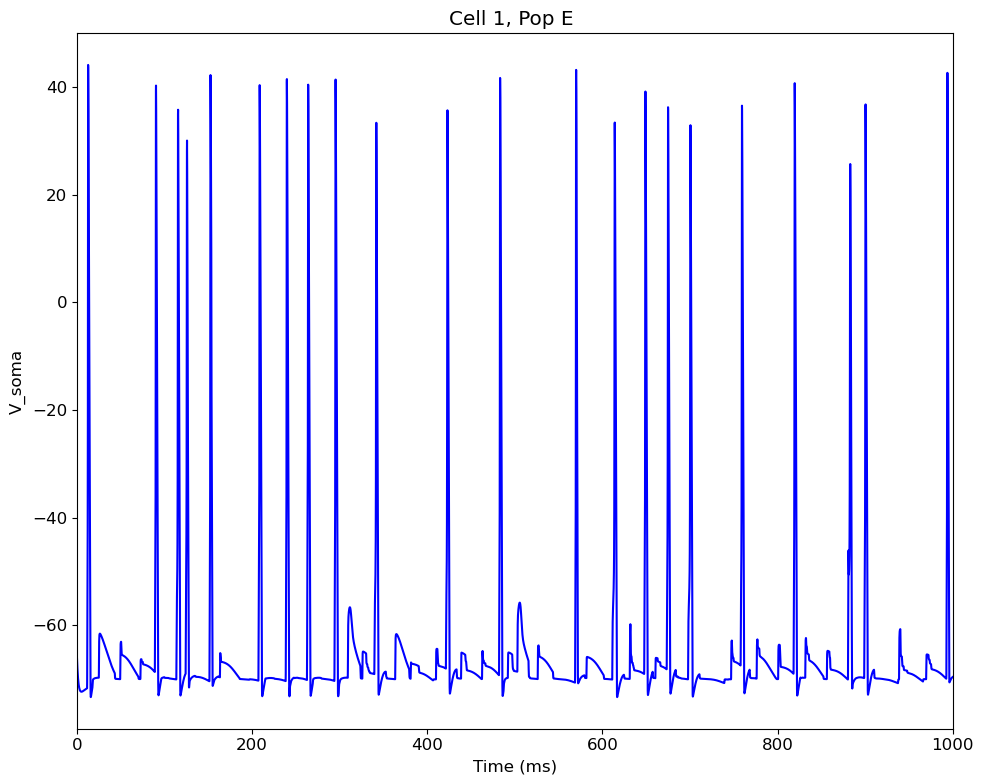

Preparing spike data...
Plotting raster...
Preparing spike data...
Plotting spike histogram...
Plotting firing rate spectrogram ...


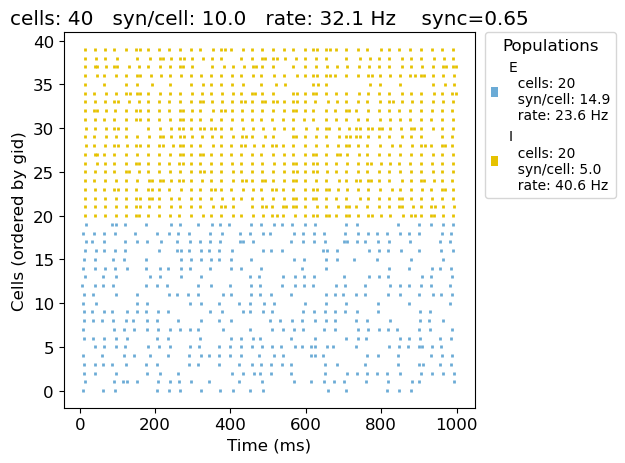

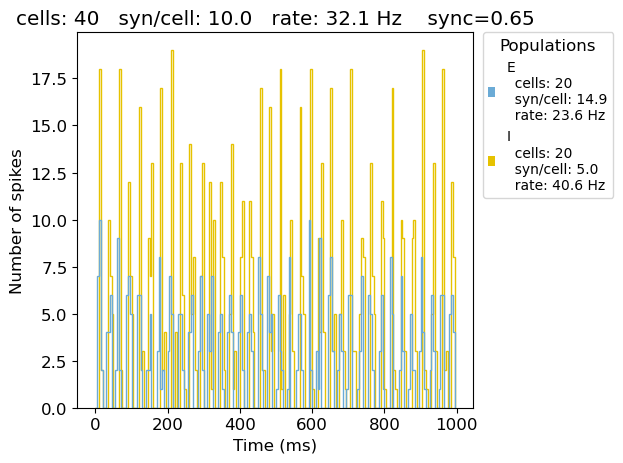

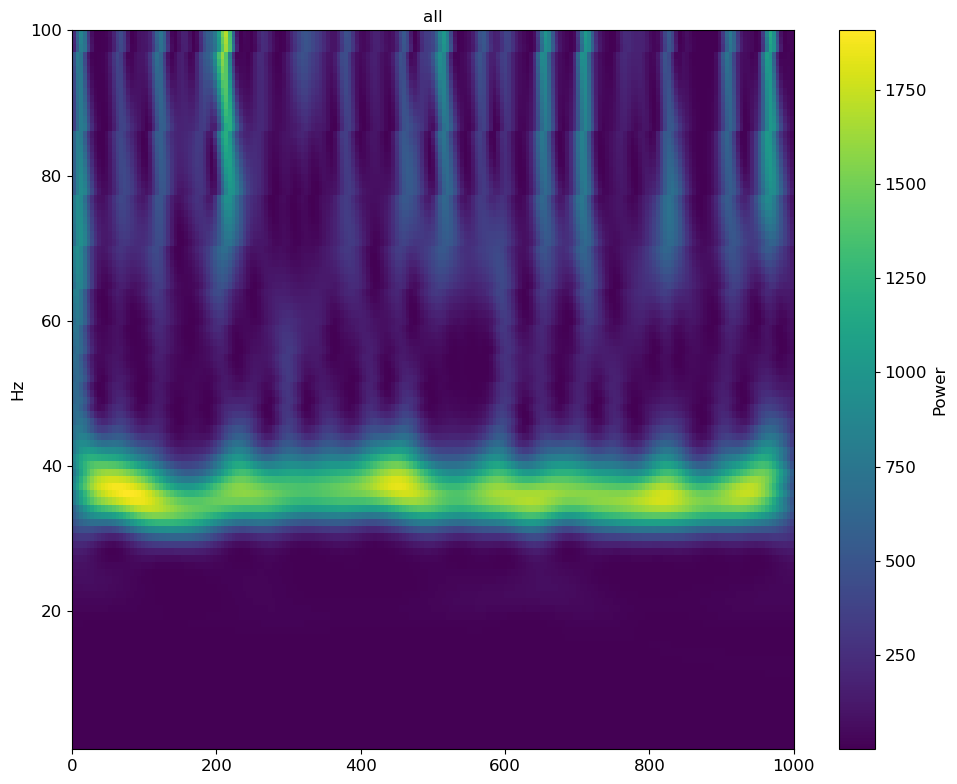

  Done; plotting time = 1.02 s

Total time = 17.40 s


In [17]:
from netpyne import specs, sim
%matplotlib inline

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters


## Cell parameters
netParams.cellParams['pyr'] = {
    'secs': {
        'soma': {
            'geom': {
                'diam': 18.8,   
                'L': 18.8, 
                'Ra': 123.0},
            'mechs': {
                'hh': {
                    'gnabar': 0.12, 
                    'gkbar': 0.036, 
                    'gl': 0.0003, 
                    'el': -70}
            }
        }
    }
}                


## Population parameters
netParams.popParams['E'] = {
    'cellType': 'pyr', 
    'numCells': 20}

netParams.popParams['I'] = {
    'cellType': 'pyr', 
    'numCells': 20}


## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': 0}  # excitatory synaptic mechanism

netParams.synMechParams['inh'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': -70}  # inhibitory synaptic mechanism


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 50, 
    'noise': 0.5}
    
netParams.stimTargetParams['bkg->E'] = {
    'source': 'bkg', 
    'conds': {'pop': 'E'}, 
    'weight': 0.01, 
    'delay': 5, 
    'synMech': 'exc'}


## Connectivity rules
netParams.connParams['E->I'] = {    #  S -> I label
    'preConds': {'pop': 'E'},       # conditions of presyn cells
    'postConds': {'pop': 'I'},      # conditions of postsyn cells
    'divergence': 5,               # probability of connection
    'weight': 0.01,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['I->E'] = {    #  I -> S label
    'preConds': {'pop': 'I'},       # conditions of presyn cells
    'postConds': {'pop': 'E'},      # conditions of postsyn cells
    'probability': 0.7,               # probability of connection
    'weight': 0.02,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'inh'}               # synaptic mechanism


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.01                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut_oscillation'  # Set file output name
simConfig.saveJson = False

simConfig.recordLFP = [[50, 50, 50]]
simConfig.recordDipole = True

simConfig.analysis['plotTraces'] = {'include': [1], 'saveFig': True}  # Plot recorded traces for this list of cells
simConfig.analysis['plotRaster'] = {'showFig': True}                  # Plot a raster
simConfig.analysis['plotSpikeHist'] = {'include': ['E', 'I'], 'showFig': True}
simConfig.analysis['plotRateSpectrogram'] = {'include': ['all'], 'saveFig': True}


# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


Preparing LFP data...
Plotting LFP time series...


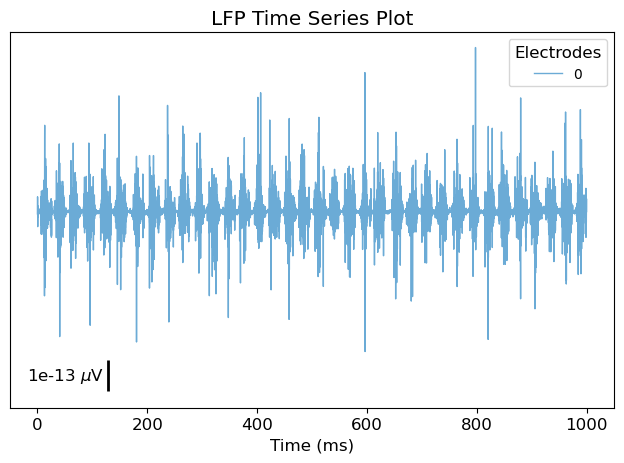

In [18]:
sim.plotting.plotLFPTimeSeries(electrodes=[0])

Preparing LFP data...
Preparing spectrogram data...
Plotting LFP spectrogram...


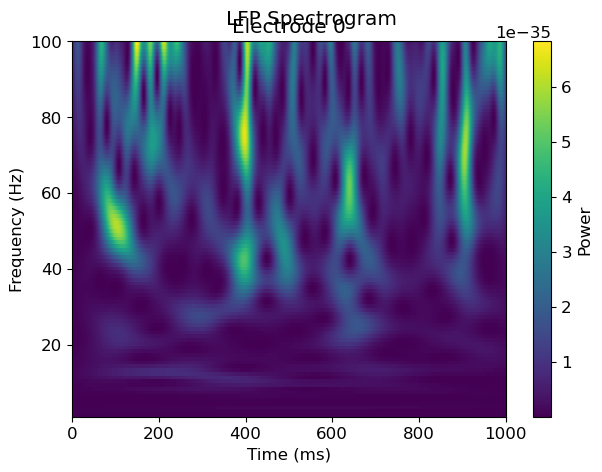

<Figure size 640x480 with 0 Axes>

In [19]:
sim.plotting.plotLFPSpectrogram(electrodes=[0])

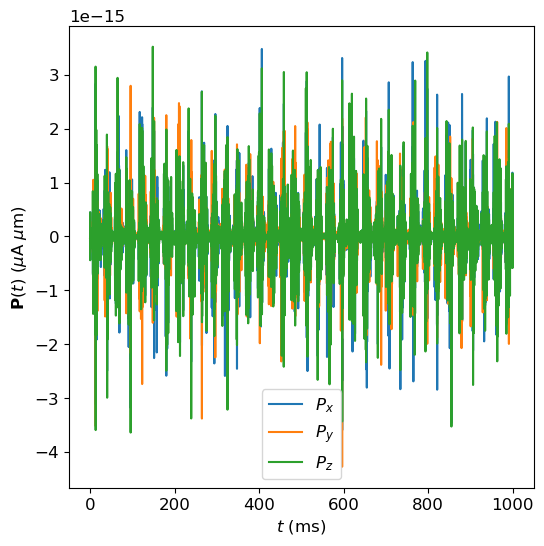

In [20]:
sim.analysis.plotDipole()

In [21]:
#!pip install h5py
sim.analysis.plotEEG()

OSError: Unable to synchronously open file (file signature not found)

## Hands-on exercise

Modify parameters and rerun the model to get different oscillation frequencies.

Hint 1: try changing connection parameters (weights, probability, delay, synaptic time constants) and cell biophysics 

Hint 2: if you want the simulation to run faster comment out the `simConfig.recordLFP = [[50, 50, 50]]` and `simConfig.recordDipole = True` lines